In [24]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

print(tf.__version__)

2.2.0


In [25]:
data = pd.read_csv('train_data.csv')
dataT = pd.read_csv('test_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BookingID                29020 non-null  int64  
 1   LeadTime                 29020 non-null  int64  
 2   ArrivalYear              29020 non-null  int64  
 3   ArrivalMonth             29020 non-null  int64  
 4   ArrivalDate              29020 non-null  int64  
 5   NumWeekendNights         29020 non-null  int64  
 6   NumWeekNights            29020 non-null  int64  
 7   MealPlan                 29020 non-null  object 
 8   Parking                  29020 non-null  int64  
 9   RoomType                 29020 non-null  object 
 10  NumAdults                29020 non-null  int64  
 11  NumChildren              29020 non-null  int64  
 12  MarketSegment            29020 non-null  object 
 13  RepeatedGuest            29020 non-null  int64  
 14  NumPrevCancellations  

In [26]:
# GOOD NO NULL VALUES
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
BookingID,0,0.0
LeadTime,0,0.0
ArrivalYear,0,0.0
ArrivalMonth,0,0.0
ArrivalDate,0,0.0
NumWeekendNights,0,0.0
NumWeekNights,0,0.0
MealPlan,0,0.0
Parking,0,0.0
RoomType,0,0.0


In [27]:
len(data)

29020

In [28]:
numerical = ['LeadTime', 'NumWeekendNights', 'NumWeekNights', 'Parking', 'NumAdults', 'NumChildren', 'NumPrevCancellations', 'NumPreviousNonCancelled', 'AvgRoomPrice', 'SpecialRequests']
categorical = ['ArrivalYear', 'ArrivalMonth', 'ArrivalDate', 'MealPlan', 'RoomType', 'MarketSegment', 'RepeatedGuest']
features = numerical + categorical
target = 'BookingStatus'

features

['LeadTime',
 'NumWeekendNights',
 'NumWeekNights',
 'Parking',
 'NumAdults',
 'NumChildren',
 'NumPrevCancellations',
 'NumPreviousNonCancelled',
 'AvgRoomPrice',
 'SpecialRequests',
 'ArrivalYear',
 'ArrivalMonth',
 'ArrivalDate',
 'MealPlan',
 'RoomType',
 'MarketSegment',
 'RepeatedGuest']

In [29]:
data[numerical].describe()

,LeadTime,NumWeekendNights,NumWeekNights,Parking,NumAdults,NumChildren,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests
count,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000,29020.000000
mean,85.276085,0.812646,2.207788,0.030772,1.846899,0.104445,0.024673,0.159201,103.474264,0.620331
std,85.886439,0.873318,1.421784,0.172702,0.518475,0.402892,0.383250,1.821987,35.052557,0.786679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,57.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,99.865000,0.000000
75%,127.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,120.127500,1.000000
max,443.000000,7.000000,17.000000,1.000000,4.000000,10.000000,13.000000,58.000000,540.000000,5.000000


In [30]:
for c in categorical:
    data[c] = data[c].astype('category')

data[categorical].describe()

,ArrivalYear,ArrivalMonth,ArrivalDate,MealPlan,RoomType,MarketSegment,RepeatedGuest
count,29020,29020,29020,29020,29020,29020,29020
unique,2,12,31,4,7,5,2
top,2018,10,13,Meal Plan 1,Room_Type 1,Online,0
freq,23781,4245,1103,22249,22470,18593,28276


In [31]:
for col in categorical:
    print(f'''Value count of: {col}:''')
    print('-' * 50)
    print(data[col].value_counts())
    print()

Value count of: ArrivalYear:
--------------------------------------------------
2018    23781
2017     5239
Name: ArrivalYear, dtype: int64

Value count of: ArrivalMonth:
--------------------------------------------------
10    4245
9     3728
8     3062
6     2551
12    2378
7     2372
11    2365
4     2168
5     2085
3     1872
2     1385
1      809
Name: ArrivalMonth, dtype: int64

Value count of: ArrivalDate:
--------------------------------------------------
13    1103
19    1075
4     1074
17    1072
2     1054
16    1051
20    1033
6     1016
18    1010
15    1003
14    1002
30     988
8      957
29     949
12     944
26     935
25     921
1      918
5      918
28     904
9      900
10     889
7      888
11     886
21     885
24     878
3      877
27     841
22     821
23     774
31     454
Name: ArrivalDate, dtype: int64

Value count of: MealPlan:
--------------------------------------------------
Meal Plan 1     22249
Not Selected     4123
Meal Plan 2      2643
Meal Plan 3    

In [32]:
!pip install folium
import folium
from folium.plugins import HeatMap
import plotly.express as px

You should consider upgrading via the 'c:\users\bkkby\anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
roomGraphData = data[data['BookingStatus'] == "Canceled"]

px.box(data_frame = roomGraphData, x = 'RoomType', y = 'AvgRoomPrice',  template = 'plotly_dark')

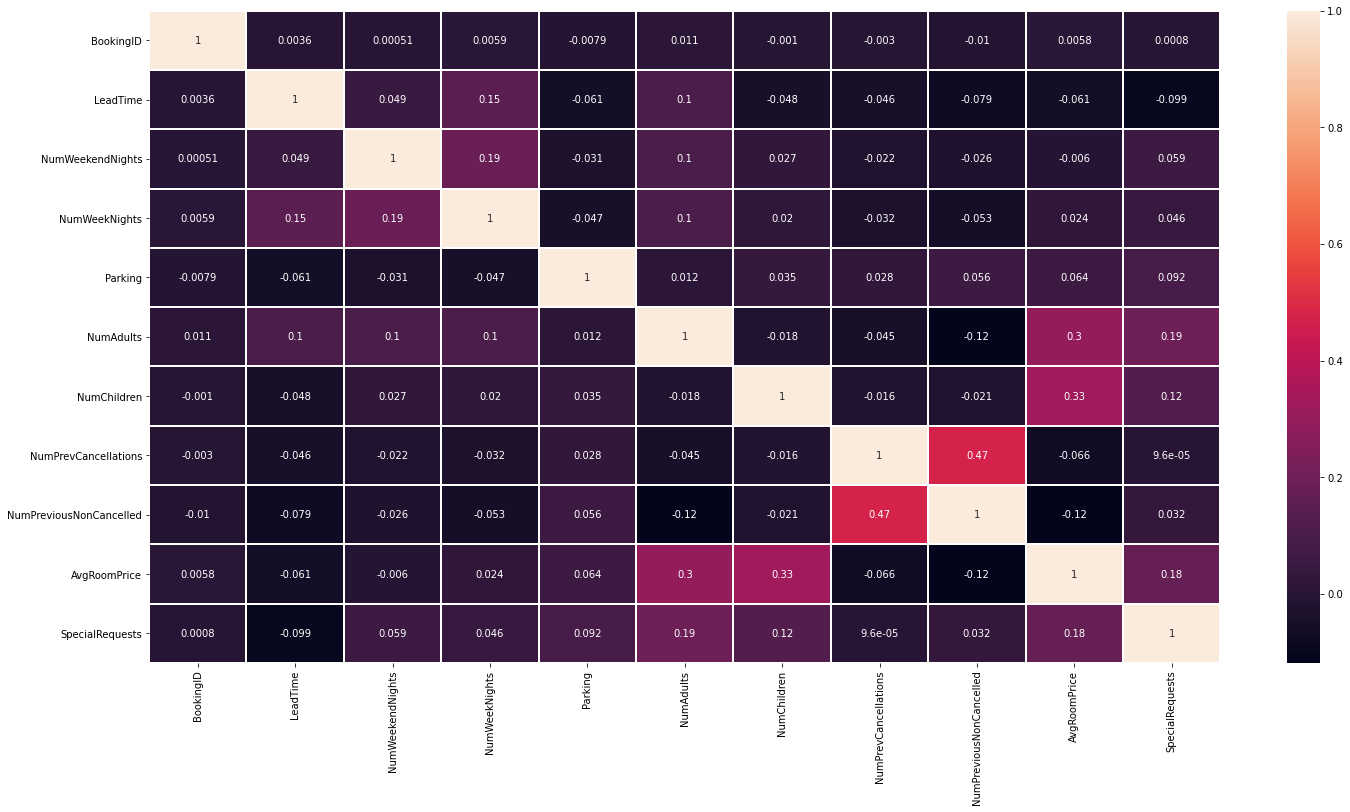

In [34]:
import seaborn as sns

# data
plt.figure(figsize = (24, 12))

corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [35]:
data['MealPlan'] = pd.factorize(data.MealPlan)[0]
data['RoomType'] = pd.factorize(data.RoomType)[0]
data['MarketSegment'] = pd.factorize(data.MarketSegment)[0]
data['BookingStatus'] = pd.factorize(data.BookingStatus)[0]

dataT['MealPlan'] = pd.factorize(dataT.MealPlan)[0]
dataT['RoomType'] = pd.factorize(dataT.RoomType)[0]
dataT['MarketSegment'] = pd.factorize(dataT.MarketSegment)[0]
dataT['BookingStatus'] = pd.factorize(dataT.BookingStatus)[0]

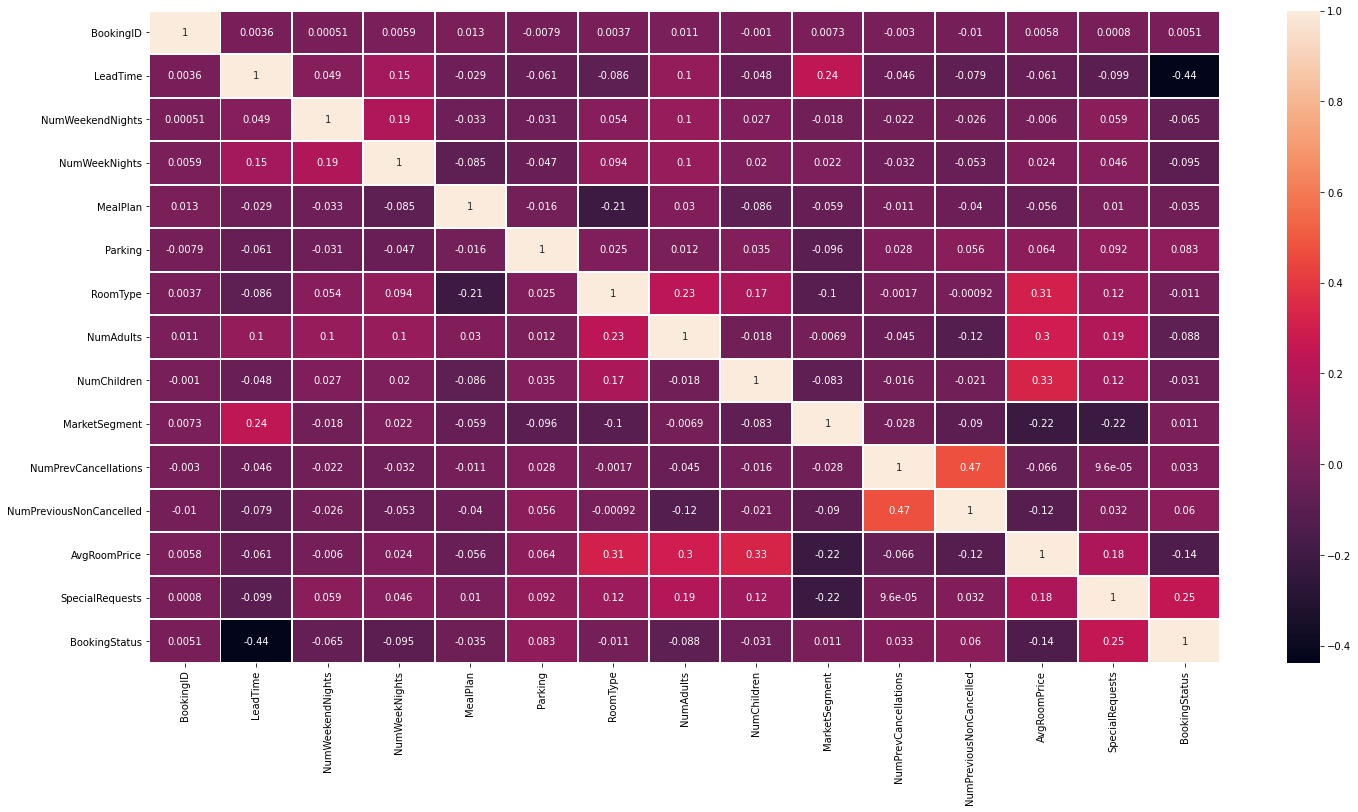

In [36]:
plt.figure(figsize = (24, 12))

corr = data.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [37]:
import statsmodels.api as sm
X = data.drop(columns=['BookingID', 'BookingStatus'])
y = data['BookingStatus']
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model - p val
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.438341
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:          BookingStatus   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29002
Method:                           MLE   Df Model:                           17
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.3073
Time:                        10:31:30   Log-Likelihood:                -12721.
converged:                       True   LL-Null:                       -18364.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1350.1114    105.589     12.786      0.000    1143.161  

In [38]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report


In [41]:
scaler = StandardScaler()
data[numerical] = scaler.fit_transform(data[numerical])

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=24)

models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), SVC(kernel='poly', degree=3), SVC(kernel='sigmoid'), ExtraTreesClassifier()]


c:\Users\bkkby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.74      0.58      0.65      1950
           1       0.81      0.90      0.85      3854

    accuracy                           0.79      5804
   macro avg       0.78      0.74      0.75      5804
weighted avg       0.79      0.79      0.78      5804

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1950
           1       0.91      0.90      0.90      3854

    accuracy                           0.87      5804
   macro avg       0.85      0.86      0.85      5804
weighted avg       0.87      0.87      0.87      5804

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1950
           1       0.91      0.95      0.93      3854

    accuracy                           0.90      5804
   macro avg       0.90      0.88      0.89      5804
weighted avg       0.90      0.90      0.90      5804

              preci

c:\Users\bkkby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1950
           1       0.66      1.00      0.80      3854

    accuracy                           0.66      5804
   macro avg       0.33      0.50      0.40      5804
weighted avg       0.44      0.66      0.53      5804



c:\Users\bkkby\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1950
           1       0.66      1.00      0.80      3854

    accuracy                           0.66      5804
   macro avg       0.33      0.50      0.40      5804
weighted avg       0.44      0.66      0.53      5804

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1950
           1       0.91      0.94      0.92      3854

    accuracy                           0.90      5804
   macro avg       0.89      0.88      0.88      5804
weighted avg       0.90      0.90      0.90      5804



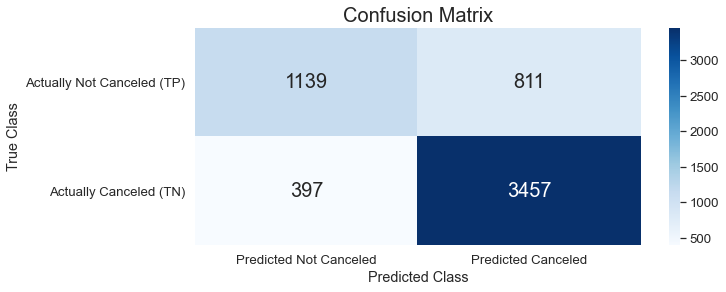

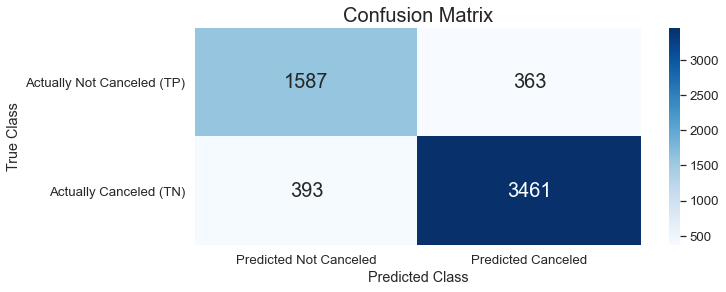

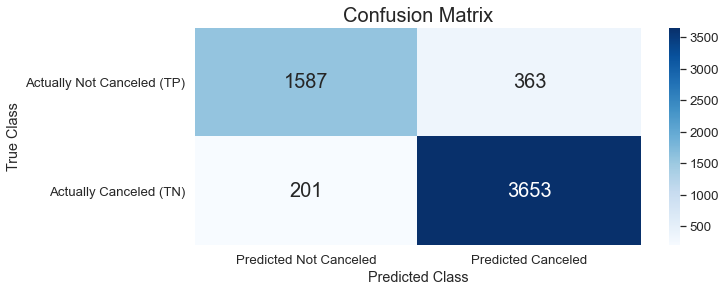

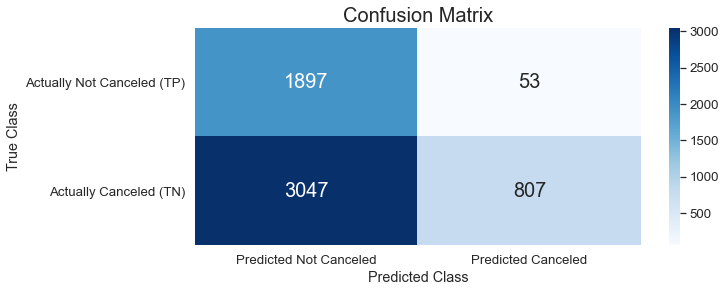

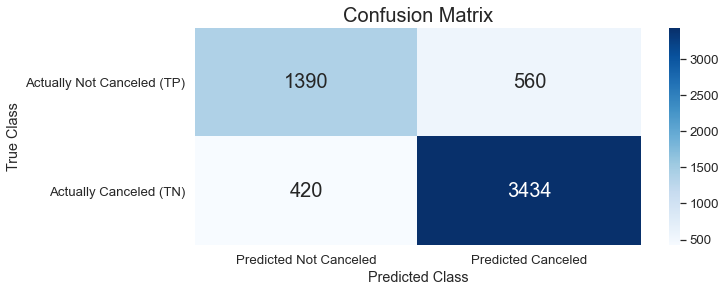

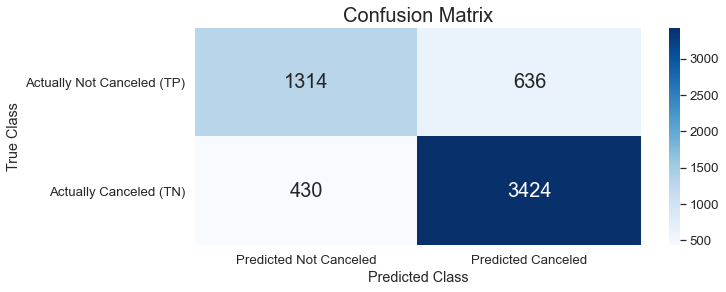

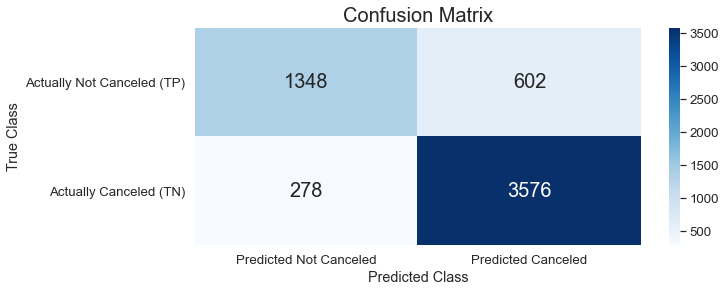

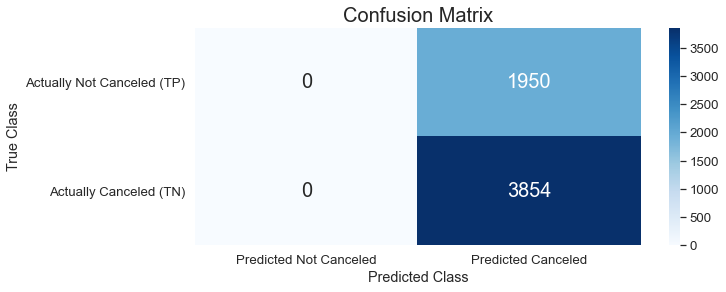

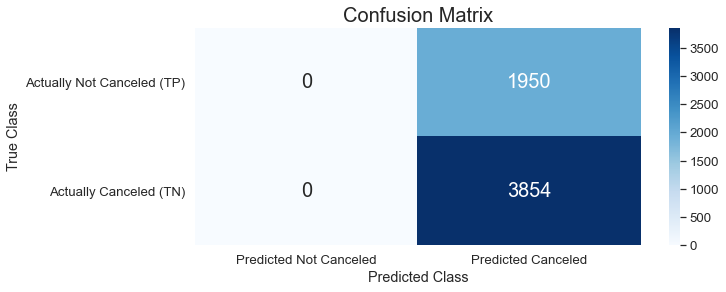

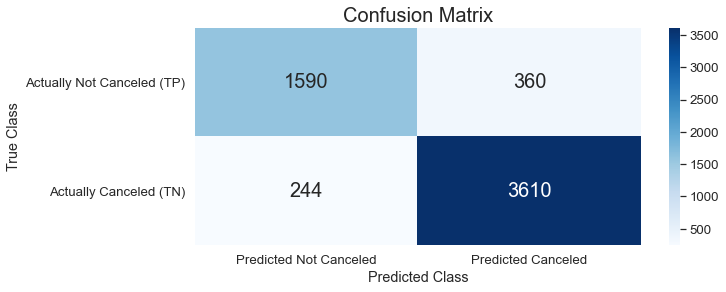

In [45]:
model_names = []
accuracies = []
precisions = []
f1_scores = []
recalls = []

def show_cmatrix(ytest, pred):
    # Creating confusion matrix 
    cm = confusion_matrix(ytest, pred)

    cm_df = pd.DataFrame(cm, index=['Actually Not Canceled (TP)', 'Actually Canceled (TN)'],
                 columns=['Predicted Not Canceled', 'Predicted Canceled'])
    
    # visualizing the confusion matrix
    sns.set(font_scale=1.2)
    plt.figure(figsize=(10,4))
        
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues",xticklabels=cm_df.columns, yticklabels=cm_df.index, annot_kws={"size": 20})
    plt.title("Confusion Matrix", size=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class');



# Loop through models
for model in models:
    # Fit model to training data
    model.fit(X_train, y_train)
    
    # Make predictions on testing data
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    show_cmatrix(y_test, y_pred)
    cl_report = classification_report(y_test, y_pred)
    print(cl_report)
    
    # Append
    model_names.append(type(model).__name__)
    accuracies.append(accuracy)
    precisions.append(precision)
    f1_scores.append(f1)
    recalls.append(recall)

In [44]:
results_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies, 'Precision': precisions, 'F1 Score': f1_scores, 'Recall Score': recalls})
results_df = results_df.sort_values(by=['F1 Score'], ascending=False)

results_df

,Model,Accuracy,Precision,F1 Score,Recall Score
2,RandomForestClassifier,0.902481,0.910180,0.928008,0.946549
9,ExtraTreesClassifier,0.894211,0.907650,0.921564,0.935911
1,DecisionTreeClassifier,0.870779,0.903956,0.902547,0.901142
6,GradientBoostingClassifier,0.848380,0.855912,0.890438,0.927867
4,KNeighborsClassifier,0.831151,0.859790,0.875127,0.891022
5,AdaBoostClassifier,0.816334,0.843350,0.865302,0.888428
0,LogisticRegression,0.791868,0.809981,0.851268,0.896990
7,SVC,0.664025,0.664025,0.798095,1.000000
8,SVC,0.664025,0.664025,0.798095,1.000000
3,GaussianNB,0.465886,0.938372,0.342384,0.209393


In [47]:
# CHOSEN RANDOMFOREST AS THE BEST
dataT[numerical] = scaler.fit_transform(dataT[numerical])

actual = dataT[features]
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
final_pre = rfc.predict(actual)

dataT[target] = final_pre
dataT

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,29020,1.462602,2018,5,20,-0.933956,-0.139305,0,-0.181348,0,0.313286,-0.270420,0,0,-0.059928,-0.089748,-0.091403,-0.786474,0
1,29021,0.417402,2018,7,6,-0.933956,1.324358,0,-0.181348,0,2.237836,-0.270420,1,0,-0.059928,-0.089748,-0.179381,0.488295,1
2,29022,-0.639412,2018,11,26,1.392117,-0.871137,1,-0.181348,0,0.313286,-0.270420,0,0,-0.059928,-0.089748,-0.431966,-0.786474,1
3,29023,1.985202,2018,6,15,-0.933956,-0.139305,2,-0.181348,0,0.313286,-0.270420,0,0,-0.059928,-0.089748,0.334301,0.488295,0
4,29024,0.429015,2018,11,25,-0.933956,-0.871137,0,-0.181348,0,-1.611263,-0.270420,2,0,-0.059928,-0.089748,-1.027951,-0.786474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,36270,-0.232946,2018,7,27,-0.933956,0.592526,0,-0.181348,3,0.313286,4.709008,0,0,-0.059928,-0.089748,2.102391,-0.786474,0
7251,36271,-0.662639,2018,9,18,1.392117,-1.602968,0,-0.181348,0,0.313286,-0.270420,0,0,-0.059928,-0.089748,1.299230,0.488295,1
7252,36272,0.359335,2018,2,28,1.392117,-0.871137,0,-0.181348,0,-1.611263,-0.270420,0,0,-0.059928,-0.089748,-2.901047,-0.786474,1
7253,36273,0.730962,2018,7,1,1.392117,2.788021,0,-0.181348,0,0.313286,-0.270420,0,0,-0.059928,-0.089748,-0.137095,1.763065,1


In [48]:
dataT.to_csv("submission.csv")